In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage.feature import blob_log
from skimage.filters import gaussian
from skimage.data import cells3d
from skimage import filters
import glob
from microfilm.microplot import microshow
import stackview
import scipy as sp

(1000, 1000)


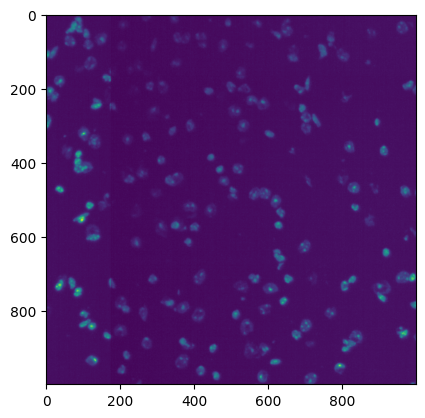

In [115]:
image = ski.io.imread(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_c01_DAPI.tif")
#image.mean()
print(image.shape)
plt.imshow(image)

In [ ]:
file_select = glob.glob(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_*.tif")
file_list = []
for file in file_select:
    file_list.append(ski.io.imread(file))

fig, axs = plt.subplots(4, 6, figsize=(25, 15))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(file_list[i])
plt.show()

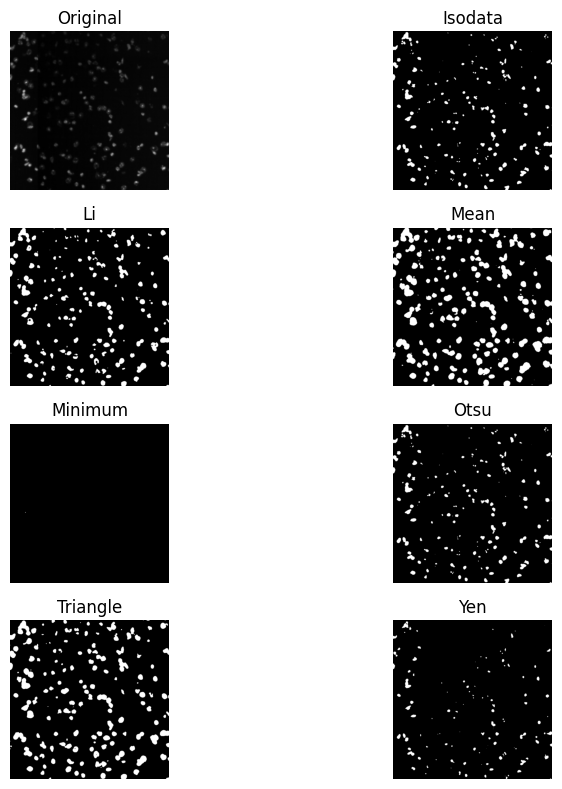

In [127]:
from skimage.io import imread
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle

from skimage.filters import try_all_threshold
from skimage.filters import gaussian, laplace
from matplotlib import pyplot as plt
import napari_simpleitk_image_processing as nsitk

image_denoised = gaussian(image, sigma=2, preserve_range=True)
image_denoised2 = laplace(image_denoised)
fig, ax = try_all_threshold(image_denoised, figsize=(10, 8), verbose=False)
plt.show()

cl.OCLArray([[0.98819494, 1.0052495 , 1.0222911 , ..., 1.0298604 , 0.99844456,
        0.99964774],
       [1.0049248 , 1.0219824 , 1.0132656 , ..., 0.97325164, 1.0482036 ,
        1.0084752 ],
       [1.0559878 , 1.0129539 , 1.012838  , ..., 1.0065346 , 0.9914479 ,
        0.9352276 ],
       ...,
       [1.012989  , 1.0045694 , 0.99615026, ..., 1.0175835 , 0.93158764,
        0.87115747],
       [0.9705834 , 0.98791635, 0.9794827 , ..., 1.0666951 , 0.9321377 ,
        0.93551606],
       [0.9883131 , 0.98845834, 1.0058011 , ..., 1.1086384 , 0.99466836,
        0.96749157]], shape=(1000, 1000), dtype=float32)
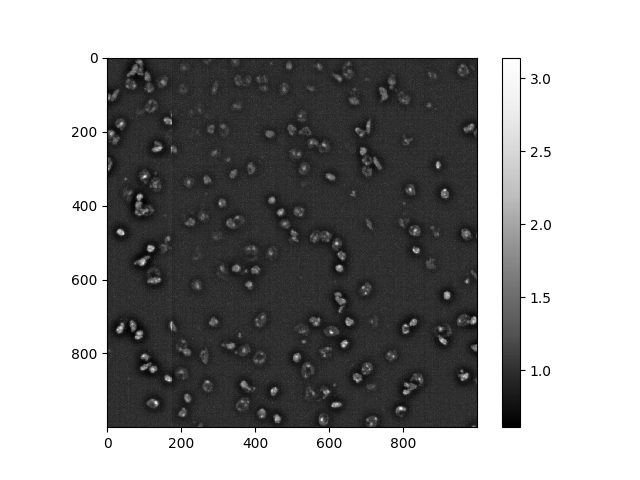
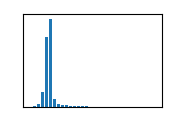

In [172]:
import pyclesperanto_prototype as cle
from skimage.io import imread, imshow
from skimage.filters import gaussian

#cle.asarray(image)
intensity_equivalized = cle.divide_by_gaussian_background(image, sigma_x=12, sigma_y=12)
intensity_equivalized

Anzahl gefundener Blobs: 170


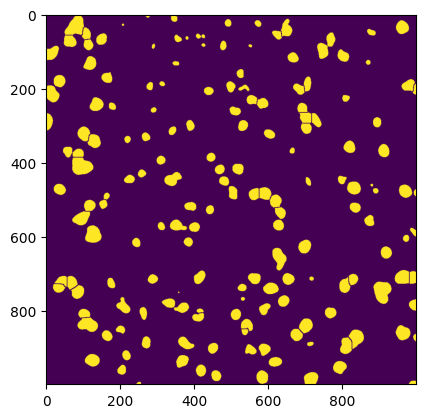

In [184]:
# making a binarized image
from napari_segment_blobs_and_things_with_membranes import threshold_otsu, split_touching_objects
from scipy import ndimage
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import gaussian, laplace

intensity_equivalized = cle.divide_by_gaussian_background(image, sigma_x=10, sigma_y=10)

image_denoised = gaussian(image, sigma=4, preserve_range=True)
#image_denoised2 = laplace(image)  # optional, for edge detection
image_binary = image_denoised > filters.threshold_li(image_denoised) # is in true and false
#imshow(image_binary)


split_objects = split_touching_objects(image_binary)
plt.imshow(split_objects)


labeled_array, num_features = ndimage.label(split_objects)

print(f"Anzahl gefundener Blobs: {num_features}")


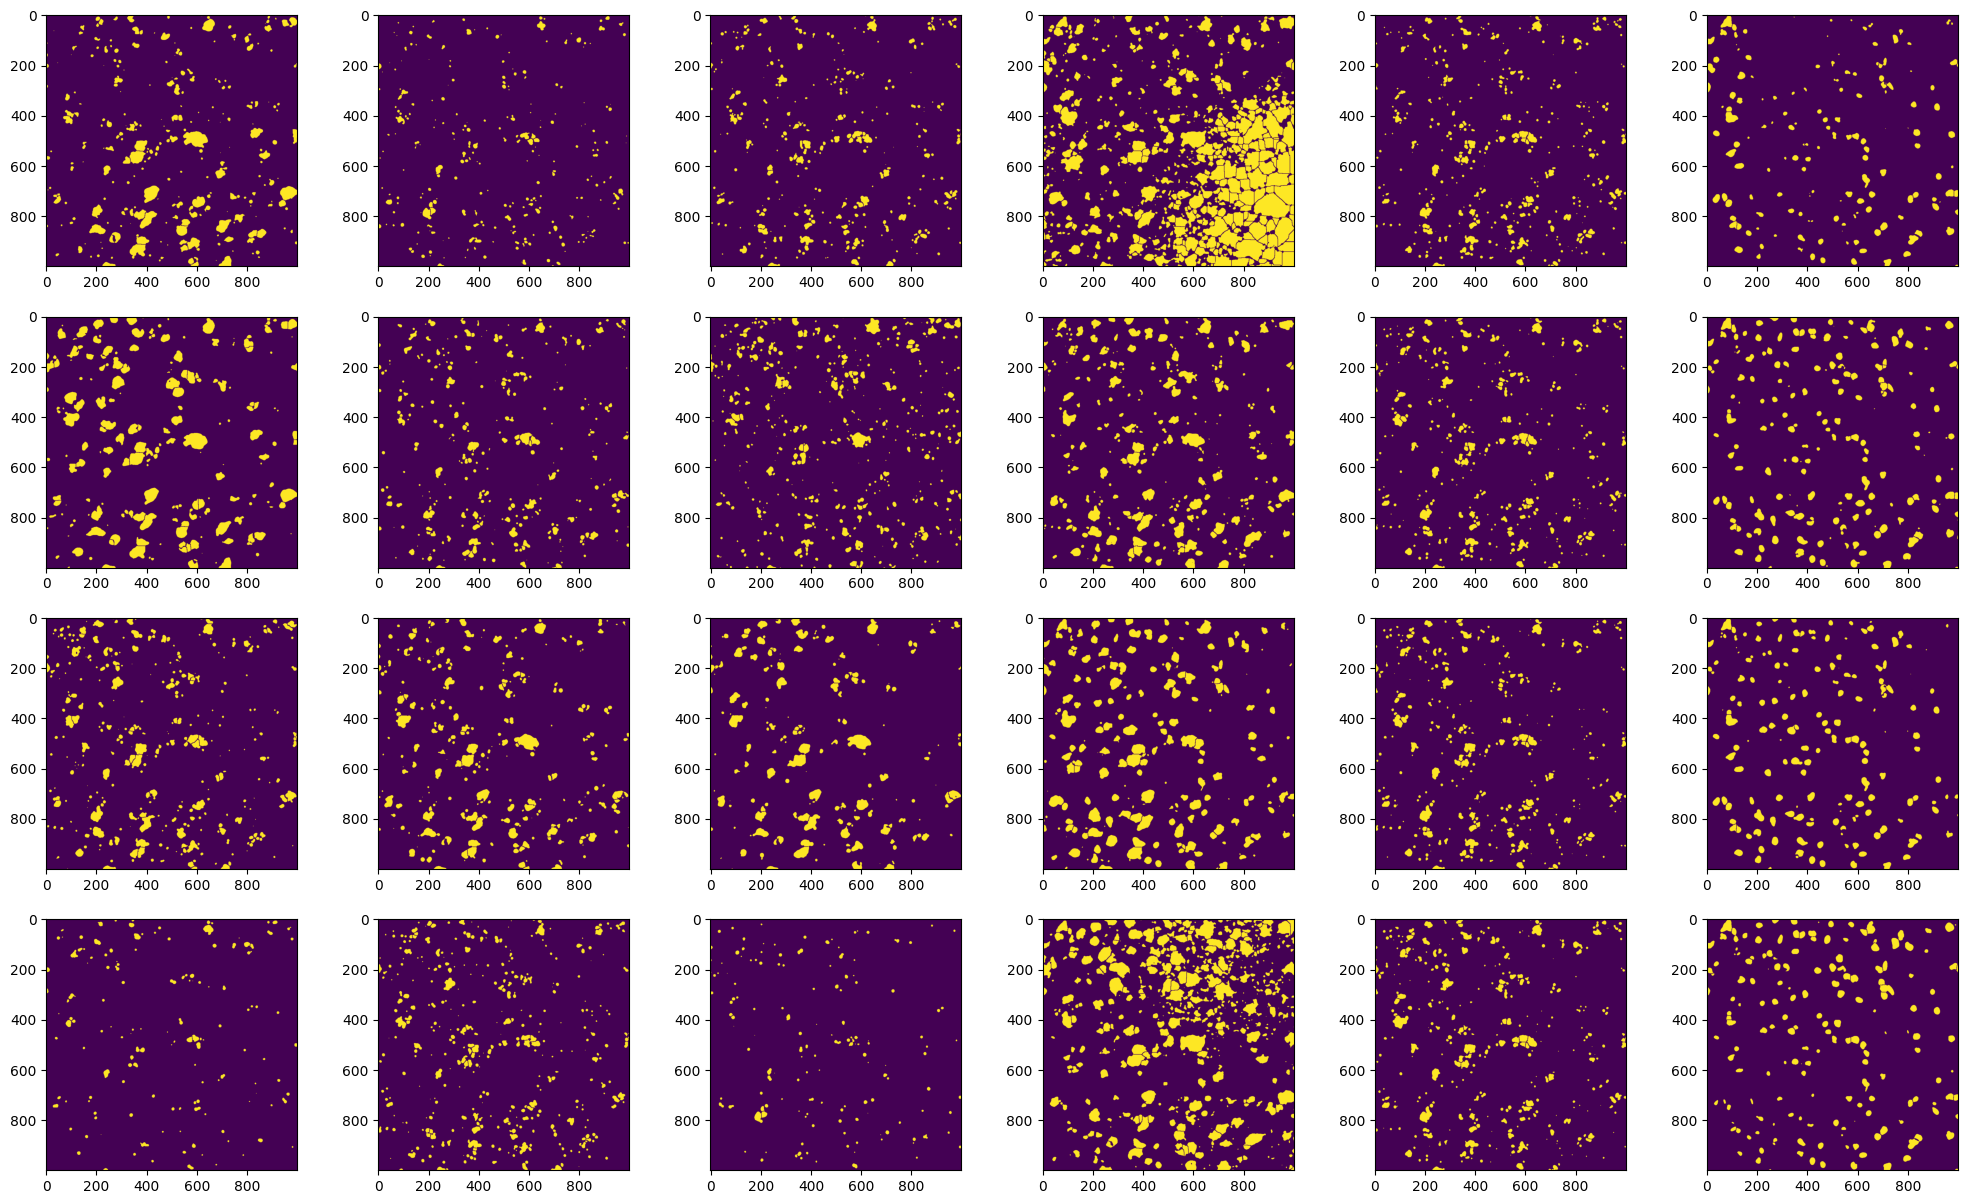

In [113]:
from napari_segment_blobs_and_things_with_membranes import threshold_otsu, split_touching_objects
import pyclesperanto as cle

xstart = 10
ystart = 10
file_select = glob.glob(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_*.tif")
file_list = []
for file in file_select:
    file_list.append(ski.io.imread(file))

#fig, axs = plt.subplots(4, 6, figsize=(25, 15))
#for i, ax in enumerate(axs.flatten()):
#    ax.imshow(file_list[i])
#plt.show()

binary_list = []
for image in file_list:
    image_denoised = gaussian(image, sigma=3, preserve_range=True)
    image_binary = image_denoised > filters.threshold_otsu(image_denoised)
    split_objects = split_touching_objects(image_binary)
    binary_list.append(split_objects)

fig, axs = plt.subplots(4, 6, figsize=(25, 15))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(binary_list[i])
plt.show()